# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 46kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

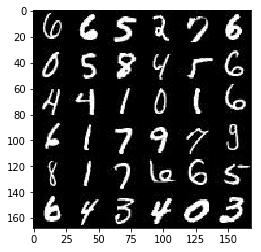

In [2]:
show_n_images = 36

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

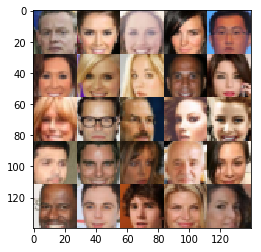

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
                    

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 128, 4, strides=2, padding="same")
        x1 = tf.maximum(x1*alpha, x1)
        
        x2 = tf.layers.conv2d(x1, 256, 4, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(x2*alpha, x2)
        
        flat = tf.reshape(x2, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)       

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [16]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
        x4 = tf.layers.conv2d(x3, 64, 3, strides=1, padding="valid")
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(x4*alpha, x4)
    
        
        # Output layer, 28x28
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 4, strides=2, padding="same")
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1] #input_z.shape[1]#
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train_opt, 
                             feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, 
                             feed_dict={inputs_z: batch_z, inputs_real: batch_images, lr: learning_rate})
                
                if steps % 20 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 0.1004... Generator Loss: 2.7211
Epoch 1/2... Discriminator Loss: 0.0719... Generator Loss: 3.8969
Epoch 1/2... Discriminator Loss: 0.5923... Generator Loss: 1.4505
Epoch 1/2... Discriminator Loss: 0.6024... Generator Loss: 1.5735
Epoch 1/2... Discriminator Loss: 0.8537... Generator Loss: 0.7860


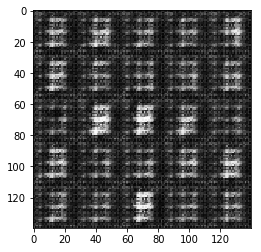

Epoch 1/2... Discriminator Loss: 0.4541... Generator Loss: 1.7278
Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 1.4407
Epoch 1/2... Discriminator Loss: 0.4527... Generator Loss: 1.8073
Epoch 1/2... Discriminator Loss: 0.5334... Generator Loss: 1.6789
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 1.3406


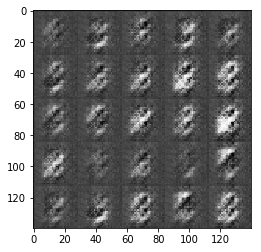

Epoch 1/2... Discriminator Loss: 0.9273... Generator Loss: 1.3672
Epoch 1/2... Discriminator Loss: 0.7107... Generator Loss: 1.0502
Epoch 1/2... Discriminator Loss: 0.6830... Generator Loss: 1.1366
Epoch 1/2... Discriminator Loss: 0.8406... Generator Loss: 0.7656
Epoch 1/2... Discriminator Loss: 0.7630... Generator Loss: 0.8993


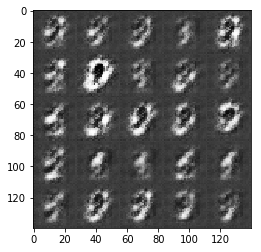

Epoch 1/2... Discriminator Loss: 0.6718... Generator Loss: 1.4741
Epoch 1/2... Discriminator Loss: 0.8436... Generator Loss: 1.3567
Epoch 1/2... Discriminator Loss: 0.7232... Generator Loss: 1.2009
Epoch 1/2... Discriminator Loss: 0.6098... Generator Loss: 1.9327
Epoch 1/2... Discriminator Loss: 0.5790... Generator Loss: 1.4675


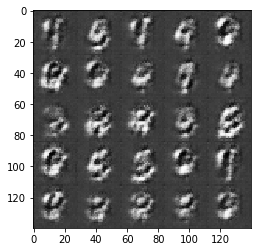

Epoch 1/2... Discriminator Loss: 0.5003... Generator Loss: 1.9104
Epoch 1/2... Discriminator Loss: 0.5692... Generator Loss: 1.6546
Epoch 1/2... Discriminator Loss: 0.4750... Generator Loss: 1.6392
Epoch 1/2... Discriminator Loss: 0.4929... Generator Loss: 1.3213
Epoch 1/2... Discriminator Loss: 0.5107... Generator Loss: 1.2995


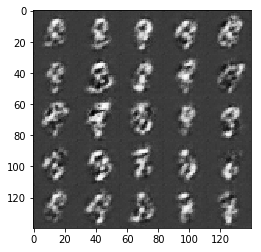

Epoch 1/2... Discriminator Loss: 0.6503... Generator Loss: 1.9597
Epoch 1/2... Discriminator Loss: 0.5052... Generator Loss: 1.3312
Epoch 1/2... Discriminator Loss: 0.4191... Generator Loss: 1.6515
Epoch 1/2... Discriminator Loss: 0.4208... Generator Loss: 2.1818
Epoch 1/2... Discriminator Loss: 0.3725... Generator Loss: 1.6563


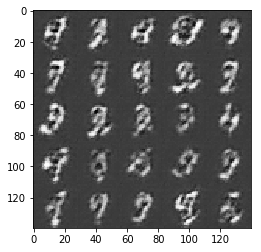

Epoch 1/2... Discriminator Loss: 0.3995... Generator Loss: 1.6028
Epoch 1/2... Discriminator Loss: 0.4372... Generator Loss: 1.4327
Epoch 1/2... Discriminator Loss: 0.3910... Generator Loss: 2.2848
Epoch 1/2... Discriminator Loss: 0.5068... Generator Loss: 1.2770
Epoch 1/2... Discriminator Loss: 0.3853... Generator Loss: 1.8516


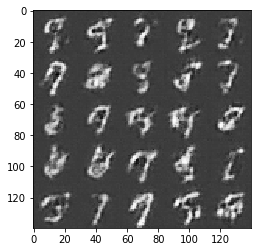

Epoch 1/2... Discriminator Loss: 0.4114... Generator Loss: 1.5480
Epoch 1/2... Discriminator Loss: 0.4377... Generator Loss: 2.5691
Epoch 1/2... Discriminator Loss: 0.5749... Generator Loss: 2.7394
Epoch 1/2... Discriminator Loss: 0.4004... Generator Loss: 1.5630
Epoch 1/2... Discriminator Loss: 0.5124... Generator Loss: 1.2376


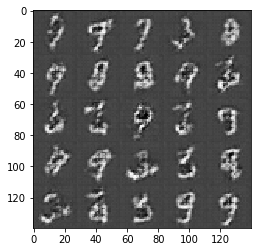

Epoch 1/2... Discriminator Loss: 0.6305... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.3734... Generator Loss: 0.3413
Epoch 1/2... Discriminator Loss: 0.6789... Generator Loss: 2.8472
Epoch 1/2... Discriminator Loss: 0.7211... Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.5758


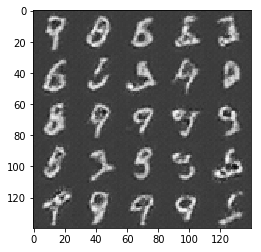

Epoch 1/2... Discriminator Loss: 0.4852... Generator Loss: 1.3626
Epoch 2/2... Discriminator Loss: 0.6764... Generator Loss: 0.8735
Epoch 2/2... Discriminator Loss: 0.3785... Generator Loss: 2.3462
Epoch 2/2... Discriminator Loss: 0.5128... Generator Loss: 2.8984
Epoch 2/2... Discriminator Loss: 1.1918... Generator Loss: 2.8319


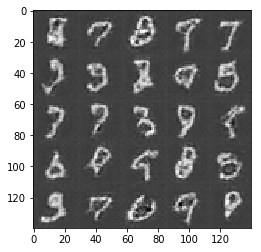

Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.1711
Epoch 2/2... Discriminator Loss: 0.2927... Generator Loss: 2.3539
Epoch 2/2... Discriminator Loss: 0.6609... Generator Loss: 0.9767
Epoch 2/2... Discriminator Loss: 0.6474... Generator Loss: 0.9821
Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 1.0294


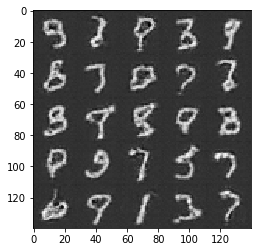

Epoch 2/2... Discriminator Loss: 0.5236... Generator Loss: 1.2348
Epoch 2/2... Discriminator Loss: 0.4258... Generator Loss: 2.0749
Epoch 2/2... Discriminator Loss: 0.5232... Generator Loss: 1.4180
Epoch 2/2... Discriminator Loss: 0.5210... Generator Loss: 1.3580
Epoch 2/2... Discriminator Loss: 0.6162... Generator Loss: 1.0388


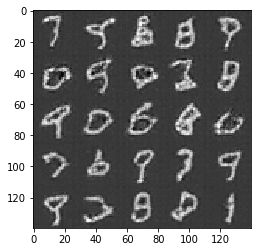

Epoch 2/2... Discriminator Loss: 0.6037... Generator Loss: 1.1621
Epoch 2/2... Discriminator Loss: 0.4321... Generator Loss: 1.8788
Epoch 2/2... Discriminator Loss: 0.5778... Generator Loss: 1.2693
Epoch 2/2... Discriminator Loss: 0.6484... Generator Loss: 1.0271
Epoch 2/2... Discriminator Loss: 0.6877... Generator Loss: 0.9448


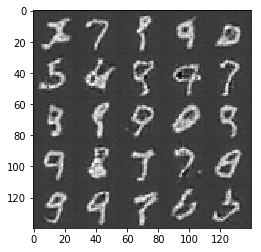

Epoch 2/2... Discriminator Loss: 0.3956... Generator Loss: 2.0348
Epoch 2/2... Discriminator Loss: 0.5015... Generator Loss: 2.4443
Epoch 2/2... Discriminator Loss: 0.4915... Generator Loss: 1.8381
Epoch 2/2... Discriminator Loss: 0.7233... Generator Loss: 2.6061
Epoch 2/2... Discriminator Loss: 0.6832... Generator Loss: 0.9119


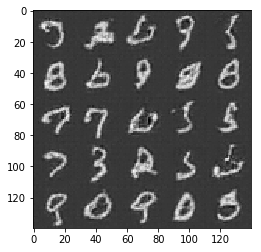

Epoch 2/2... Discriminator Loss: 0.5757... Generator Loss: 1.2281
Epoch 2/2... Discriminator Loss: 0.4641... Generator Loss: 1.5320
Epoch 2/2... Discriminator Loss: 0.4527... Generator Loss: 2.0056
Epoch 2/2... Discriminator Loss: 0.5556... Generator Loss: 1.3931
Epoch 2/2... Discriminator Loss: 0.5129... Generator Loss: 1.4876


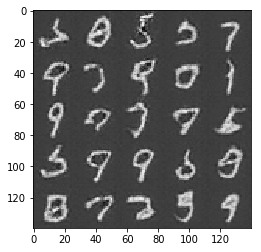

Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 2.8553
Epoch 2/2... Discriminator Loss: 0.6322... Generator Loss: 0.9793
Epoch 2/2... Discriminator Loss: 0.4418... Generator Loss: 1.7677
Epoch 2/2... Discriminator Loss: 0.3322... Generator Loss: 2.3280
Epoch 2/2... Discriminator Loss: 1.0521... Generator Loss: 0.5497


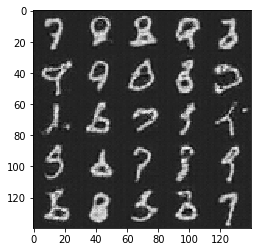

Epoch 2/2... Discriminator Loss: 0.8859... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 0.5406... Generator Loss: 1.4718
Epoch 2/2... Discriminator Loss: 0.5355... Generator Loss: 1.2955
Epoch 2/2... Discriminator Loss: 0.4843... Generator Loss: 1.2998
Epoch 2/2... Discriminator Loss: 0.5187... Generator Loss: 1.2747


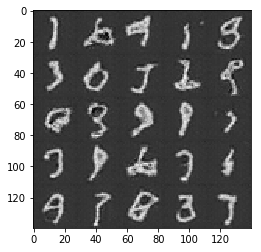

Epoch 2/2... Discriminator Loss: 0.8136... Generator Loss: 0.7838
Epoch 2/2... Discriminator Loss: 1.1692... Generator Loss: 1.8805
Epoch 2/2... Discriminator Loss: 0.4996... Generator Loss: 2.7854
Epoch 2/2... Discriminator Loss: 0.5692... Generator Loss: 2.4661
Epoch 2/2... Discriminator Loss: 0.5119... Generator Loss: 2.0372


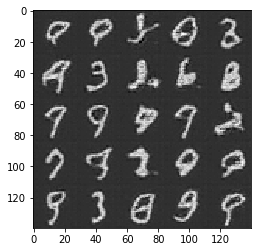

Epoch 2/2... Discriminator Loss: 0.3903... Generator Loss: 2.0979
Epoch 2/2... Discriminator Loss: 0.4516... Generator Loss: 1.4241
Epoch 2/2... Discriminator Loss: 0.8679... Generator Loss: 0.7256


In [21]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/3... Discriminator Loss: 0.8356... Generator Loss: 1.2103
Epoch 1/3... Discriminator Loss: 1.0576... Generator Loss: 0.8591
Epoch 1/3... Discriminator Loss: 0.9033... Generator Loss: 1.3711
Epoch 1/3... Discriminator Loss: 0.9683... Generator Loss: 1.1260
Epoch 1/3... Discriminator Loss: 0.9238... Generator Loss: 1.0145


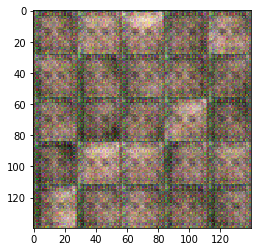

Epoch 1/3... Discriminator Loss: 0.8667... Generator Loss: 0.9151
Epoch 1/3... Discriminator Loss: 1.0352... Generator Loss: 0.9333
Epoch 1/3... Discriminator Loss: 0.9173... Generator Loss: 0.8897
Epoch 1/3... Discriminator Loss: 0.9899... Generator Loss: 1.0289
Epoch 1/3... Discriminator Loss: 0.8838... Generator Loss: 1.0736


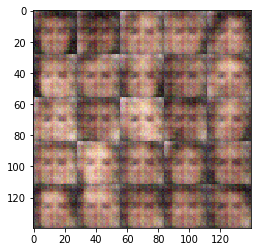

Epoch 1/3... Discriminator Loss: 0.8314... Generator Loss: 1.4613
Epoch 1/3... Discriminator Loss: 0.8390... Generator Loss: 1.0729
Epoch 1/3... Discriminator Loss: 1.3257... Generator Loss: 0.8727
Epoch 1/3... Discriminator Loss: 1.0028... Generator Loss: 0.9749
Epoch 1/3... Discriminator Loss: 1.0796... Generator Loss: 0.8918


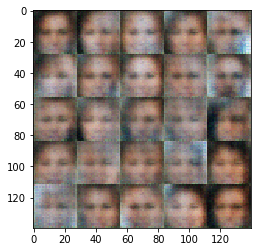

Epoch 1/3... Discriminator Loss: 0.6784... Generator Loss: 4.2663
Epoch 1/3... Discriminator Loss: 0.5813... Generator Loss: 3.8668
Epoch 1/3... Discriminator Loss: 0.4075... Generator Loss: 3.3322
Epoch 1/3... Discriminator Loss: 0.6684... Generator Loss: 1.4926
Epoch 1/3... Discriminator Loss: 1.3368... Generator Loss: 0.4638


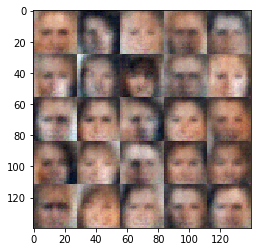

Epoch 1/3... Discriminator Loss: 0.8340... Generator Loss: 0.8837
Epoch 1/3... Discriminator Loss: 0.6324... Generator Loss: 1.4160
Epoch 1/3... Discriminator Loss: 0.7632... Generator Loss: 0.9970
Epoch 1/3... Discriminator Loss: 1.2533... Generator Loss: 0.4376
Epoch 1/3... Discriminator Loss: 0.9894... Generator Loss: 1.0366


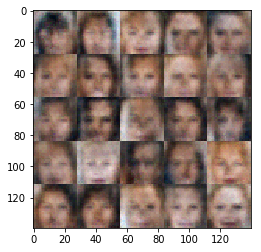

Epoch 1/3... Discriminator Loss: 0.5440... Generator Loss: 1.6619
Epoch 1/3... Discriminator Loss: 1.0911... Generator Loss: 0.5467
Epoch 1/3... Discriminator Loss: 0.9882... Generator Loss: 1.4991
Epoch 1/3... Discriminator Loss: 0.7925... Generator Loss: 1.1862
Epoch 1/3... Discriminator Loss: 0.4394... Generator Loss: 1.7483


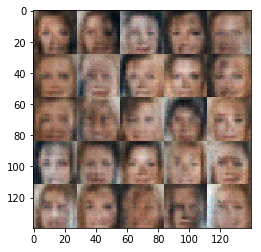

Epoch 1/3... Discriminator Loss: 0.7691... Generator Loss: 1.1137
Epoch 1/3... Discriminator Loss: 0.5584... Generator Loss: 1.1643
Epoch 1/3... Discriminator Loss: 0.7782... Generator Loss: 3.3594
Epoch 1/3... Discriminator Loss: 0.8480... Generator Loss: 1.2804
Epoch 1/3... Discriminator Loss: 0.7370... Generator Loss: 0.8740


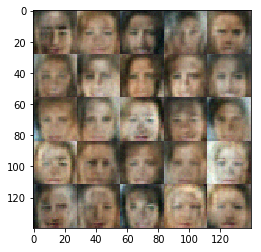

Epoch 1/3... Discriminator Loss: 0.5857... Generator Loss: 1.3329
Epoch 1/3... Discriminator Loss: 0.5029... Generator Loss: 1.3873
Epoch 1/3... Discriminator Loss: 0.8683... Generator Loss: 0.7317
Epoch 1/3... Discriminator Loss: 0.6557... Generator Loss: 0.9775
Epoch 1/3... Discriminator Loss: 0.5714... Generator Loss: 1.2179


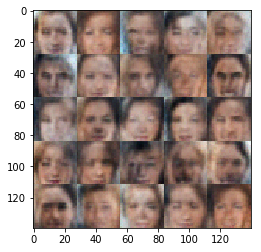

Epoch 1/3... Discriminator Loss: 0.7723... Generator Loss: 0.9064
Epoch 1/3... Discriminator Loss: 0.5977... Generator Loss: 1.1669
Epoch 1/3... Discriminator Loss: 1.1383... Generator Loss: 1.8272
Epoch 1/3... Discriminator Loss: 1.1181... Generator Loss: 0.4899
Epoch 1/3... Discriminator Loss: 0.4783... Generator Loss: 1.3785


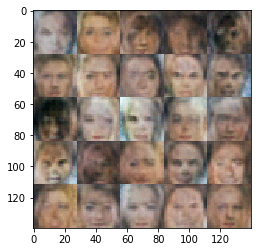

Epoch 1/3... Discriminator Loss: 0.6526... Generator Loss: 1.5736
Epoch 1/3... Discriminator Loss: 0.6144... Generator Loss: 1.0030
Epoch 1/3... Discriminator Loss: 0.2165... Generator Loss: 3.2409
Epoch 1/3... Discriminator Loss: 1.1367... Generator Loss: 0.4630
Epoch 1/3... Discriminator Loss: 0.4917... Generator Loss: 1.6569


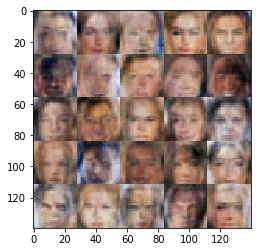

Epoch 1/3... Discriminator Loss: 0.8471... Generator Loss: 0.8191
Epoch 1/3... Discriminator Loss: 0.7472... Generator Loss: 1.7392
Epoch 1/3... Discriminator Loss: 0.8943... Generator Loss: 2.6074
Epoch 1/3... Discriminator Loss: 1.3953... Generator Loss: 0.3392
Epoch 1/3... Discriminator Loss: 0.2254... Generator Loss: 2.9989


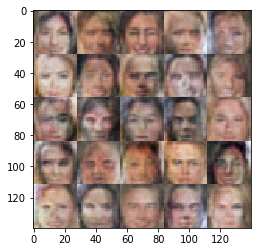

Epoch 1/3... Discriminator Loss: 0.2125... Generator Loss: 2.6805
Epoch 1/3... Discriminator Loss: 0.8054... Generator Loss: 0.8099
Epoch 1/3... Discriminator Loss: 1.3060... Generator Loss: 0.3901
Epoch 1/3... Discriminator Loss: 0.3981... Generator Loss: 2.8900
Epoch 1/3... Discriminator Loss: 1.1297... Generator Loss: 0.5203


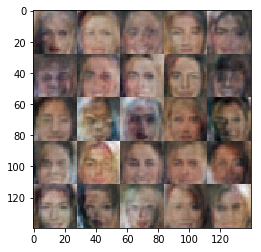

Epoch 1/3... Discriminator Loss: 0.3368... Generator Loss: 1.7705
Epoch 1/3... Discriminator Loss: 0.2127... Generator Loss: 3.0355
Epoch 1/3... Discriminator Loss: 0.6614... Generator Loss: 7.5720
Epoch 1/3... Discriminator Loss: 1.0518... Generator Loss: 0.5267
Epoch 1/3... Discriminator Loss: 0.3237... Generator Loss: 2.0889


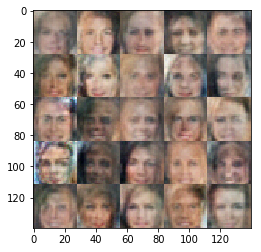

Epoch 1/3... Discriminator Loss: 0.3020... Generator Loss: 2.9349
Epoch 1/3... Discriminator Loss: 0.6758... Generator Loss: 2.4595
Epoch 1/3... Discriminator Loss: 0.5330... Generator Loss: 1.5571
Epoch 1/3... Discriminator Loss: 0.4434... Generator Loss: 2.7670
Epoch 1/3... Discriminator Loss: 0.1776... Generator Loss: 3.2371


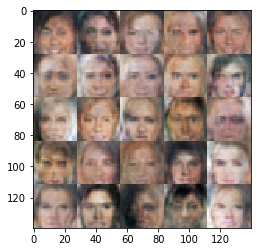

Epoch 1/3... Discriminator Loss: 0.1993... Generator Loss: 3.3787
Epoch 1/3... Discriminator Loss: 1.1747... Generator Loss: 0.4862
Epoch 1/3... Discriminator Loss: 0.5280... Generator Loss: 1.2660
Epoch 1/3... Discriminator Loss: 0.2371... Generator Loss: 4.6190
Epoch 1/3... Discriminator Loss: 0.2298... Generator Loss: 4.6435


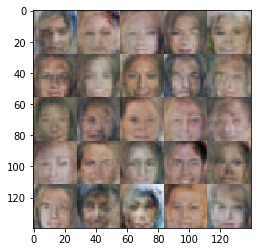

Epoch 1/3... Discriminator Loss: 0.7540... Generator Loss: 0.8558
Epoch 1/3... Discriminator Loss: 0.3291... Generator Loss: 2.0058
Epoch 1/3... Discriminator Loss: 0.5845... Generator Loss: 1.5718
Epoch 1/3... Discriminator Loss: 0.7814... Generator Loss: 0.7590
Epoch 1/3... Discriminator Loss: 0.5787... Generator Loss: 1.3033


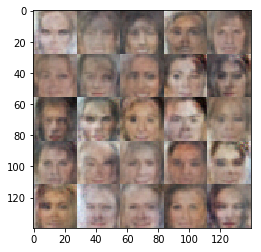

Epoch 1/3... Discriminator Loss: 0.5838... Generator Loss: 1.0687
Epoch 1/3... Discriminator Loss: 0.4161... Generator Loss: 2.7308
Epoch 1/3... Discriminator Loss: 0.3737... Generator Loss: 3.3219
Epoch 1/3... Discriminator Loss: 0.4717... Generator Loss: 3.0291
Epoch 1/3... Discriminator Loss: 0.9475... Generator Loss: 2.9611


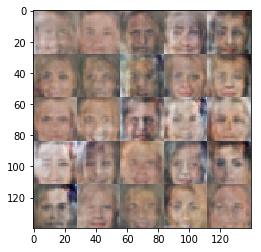

Epoch 1/3... Discriminator Loss: 0.4766... Generator Loss: 2.2638
Epoch 1/3... Discriminator Loss: 0.3082... Generator Loss: 2.0278
Epoch 1/3... Discriminator Loss: 0.2815... Generator Loss: 3.3130
Epoch 1/3... Discriminator Loss: 0.5286... Generator Loss: 1.2638
Epoch 1/3... Discriminator Loss: 0.2756... Generator Loss: 3.6933


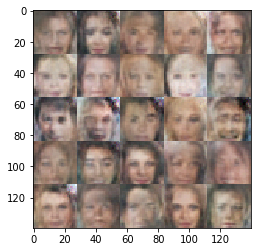

Epoch 1/3... Discriminator Loss: 0.7548... Generator Loss: 0.9930
Epoch 1/3... Discriminator Loss: 0.6658... Generator Loss: 1.0229
Epoch 1/3... Discriminator Loss: 2.2040... Generator Loss: 0.1610
Epoch 1/3... Discriminator Loss: 0.4728... Generator Loss: 1.8837
Epoch 1/3... Discriminator Loss: 2.4954... Generator Loss: 0.1211


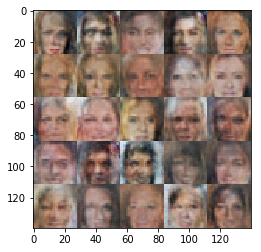

Epoch 1/3... Discriminator Loss: 0.4835... Generator Loss: 1.8611
Epoch 1/3... Discriminator Loss: 0.3069... Generator Loss: 2.0795
Epoch 1/3... Discriminator Loss: 0.2004... Generator Loss: 5.0329
Epoch 1/3... Discriminator Loss: 0.5236... Generator Loss: 1.7410
Epoch 1/3... Discriminator Loss: 0.3610... Generator Loss: 1.6661


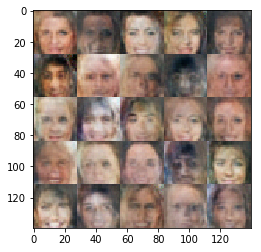

Epoch 1/3... Discriminator Loss: 0.7827... Generator Loss: 1.2689
Epoch 1/3... Discriminator Loss: 0.4285... Generator Loss: 2.2709
Epoch 1/3... Discriminator Loss: 0.5169... Generator Loss: 1.1874
Epoch 1/3... Discriminator Loss: 0.8109... Generator Loss: 0.8582
Epoch 1/3... Discriminator Loss: 0.2938... Generator Loss: 4.2964


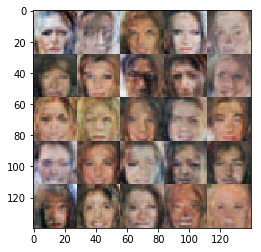

Epoch 1/3... Discriminator Loss: 0.3699... Generator Loss: 2.7564
Epoch 1/3... Discriminator Loss: 0.4149... Generator Loss: 2.1763
Epoch 1/3... Discriminator Loss: 0.6385... Generator Loss: 1.0182
Epoch 1/3... Discriminator Loss: 0.6526... Generator Loss: 1.3754
Epoch 1/3... Discriminator Loss: 0.6242... Generator Loss: 1.7093


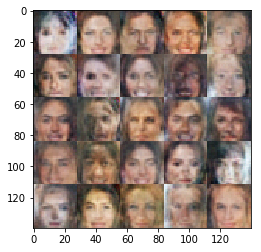

Epoch 1/3... Discriminator Loss: 0.2394... Generator Loss: 5.1888
Epoch 1/3... Discriminator Loss: 0.3071... Generator Loss: 4.4705
Epoch 1/3... Discriminator Loss: 0.4920... Generator Loss: 2.4924
Epoch 1/3... Discriminator Loss: 3.1552... Generator Loss: 0.0927
Epoch 1/3... Discriminator Loss: 0.6038... Generator Loss: 1.6335


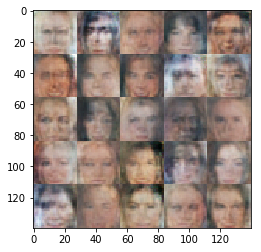

Epoch 1/3... Discriminator Loss: 0.3202... Generator Loss: 2.7964
Epoch 1/3... Discriminator Loss: 0.4115... Generator Loss: 2.0294
Epoch 1/3... Discriminator Loss: 0.4143... Generator Loss: 2.8434
Epoch 1/3... Discriminator Loss: 0.3629... Generator Loss: 3.8182
Epoch 1/3... Discriminator Loss: 0.2978... Generator Loss: 3.2470


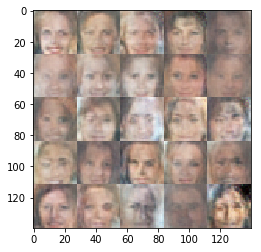

Epoch 1/3... Discriminator Loss: 0.2277... Generator Loss: 3.3541
Epoch 1/3... Discriminator Loss: 0.2794... Generator Loss: 2.3347
Epoch 1/3... Discriminator Loss: 0.3375... Generator Loss: 2.3468
Epoch 1/3... Discriminator Loss: 0.2365... Generator Loss: 2.2098
Epoch 1/3... Discriminator Loss: 1.3036... Generator Loss: 0.7310


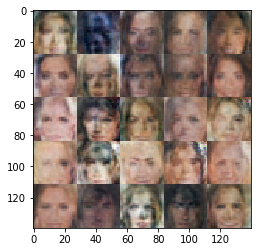

Epoch 1/3... Discriminator Loss: 0.5794... Generator Loss: 1.9139
Epoch 1/3... Discriminator Loss: 0.4251... Generator Loss: 2.3389
Epoch 1/3... Discriminator Loss: 0.3994... Generator Loss: 2.2805
Epoch 1/3... Discriminator Loss: 0.5605... Generator Loss: 2.2946
Epoch 1/3... Discriminator Loss: 0.2307... Generator Loss: 3.9383


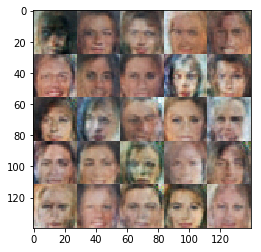

Epoch 1/3... Discriminator Loss: 0.4354... Generator Loss: 2.0243
Epoch 1/3... Discriminator Loss: 0.6647... Generator Loss: 1.5785
Epoch 1/3... Discriminator Loss: 0.2835... Generator Loss: 2.3999
Epoch 1/3... Discriminator Loss: 1.1036... Generator Loss: 0.5441
Epoch 1/3... Discriminator Loss: 0.2302... Generator Loss: 3.2138


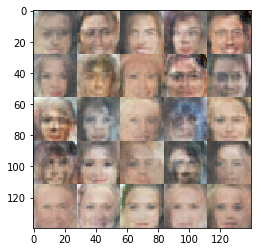

Epoch 1/3... Discriminator Loss: 0.5486... Generator Loss: 3.3057
Epoch 1/3... Discriminator Loss: 0.3639... Generator Loss: 4.5338
Epoch 1/3... Discriminator Loss: 0.7113... Generator Loss: 2.1847
Epoch 1/3... Discriminator Loss: 0.9033... Generator Loss: 0.8595
Epoch 1/3... Discriminator Loss: 0.7050... Generator Loss: 1.9028


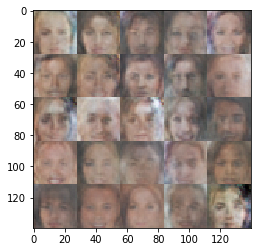

Epoch 1/3... Discriminator Loss: 0.7836... Generator Loss: 0.9935
Epoch 1/3... Discriminator Loss: 0.5308... Generator Loss: 1.7157
Epoch 1/3... Discriminator Loss: 0.4358... Generator Loss: 2.2785
Epoch 1/3... Discriminator Loss: 0.3967... Generator Loss: 2.2311
Epoch 1/3... Discriminator Loss: 0.3863... Generator Loss: 2.0030


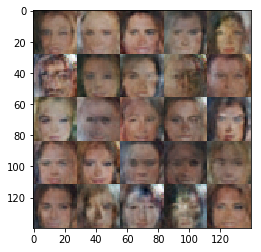

Epoch 1/3... Discriminator Loss: 0.1833... Generator Loss: 5.0549
Epoch 1/3... Discriminator Loss: 0.3716... Generator Loss: 5.4642
Epoch 1/3... Discriminator Loss: 0.3046... Generator Loss: 4.2484
Epoch 1/3... Discriminator Loss: 0.4877... Generator Loss: 1.6612
Epoch 1/3... Discriminator Loss: 0.3666... Generator Loss: 7.1920


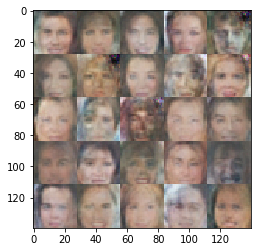

Epoch 1/3... Discriminator Loss: 0.7270... Generator Loss: 1.2064
Epoch 1/3... Discriminator Loss: 0.5287... Generator Loss: 2.5464
Epoch 1/3... Discriminator Loss: 0.3672... Generator Loss: 6.2414
Epoch 1/3... Discriminator Loss: 0.9140... Generator Loss: 1.2349
Epoch 1/3... Discriminator Loss: 0.9181... Generator Loss: 1.0405


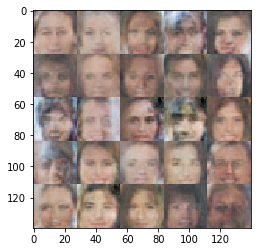

Epoch 1/3... Discriminator Loss: 0.2888... Generator Loss: 2.2085
Epoch 1/3... Discriminator Loss: 0.3985... Generator Loss: 3.6503
Epoch 1/3... Discriminator Loss: 0.7439... Generator Loss: 1.6719
Epoch 2/3... Discriminator Loss: 0.3117... Generator Loss: 2.7351
Epoch 2/3... Discriminator Loss: 0.3142... Generator Loss: 3.8464


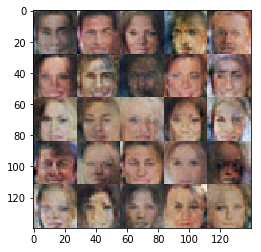

Epoch 2/3... Discriminator Loss: 1.0371... Generator Loss: 1.4916
Epoch 2/3... Discriminator Loss: 0.7551... Generator Loss: 1.5277
Epoch 2/3... Discriminator Loss: 0.3793... Generator Loss: 2.5645
Epoch 2/3... Discriminator Loss: 0.8071... Generator Loss: 2.7396
Epoch 2/3... Discriminator Loss: 0.7789... Generator Loss: 2.9688


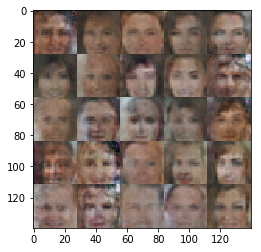

Epoch 2/3... Discriminator Loss: 0.6292... Generator Loss: 1.6709
Epoch 2/3... Discriminator Loss: 0.7848... Generator Loss: 2.0088
Epoch 2/3... Discriminator Loss: 0.3843... Generator Loss: 2.6137
Epoch 2/3... Discriminator Loss: 1.3764... Generator Loss: 0.4217
Epoch 2/3... Discriminator Loss: 0.6412... Generator Loss: 2.2484


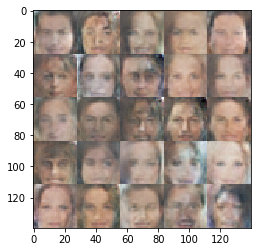

Epoch 2/3... Discriminator Loss: 0.3862... Generator Loss: 2.8906
Epoch 2/3... Discriminator Loss: 0.5745... Generator Loss: 2.8813
Epoch 2/3... Discriminator Loss: 0.4534... Generator Loss: 3.5053
Epoch 2/3... Discriminator Loss: 0.3330... Generator Loss: 5.2132
Epoch 2/3... Discriminator Loss: 0.6412... Generator Loss: 1.5012


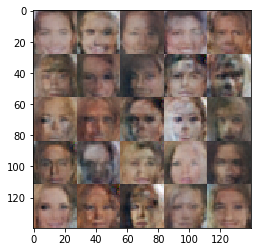

Epoch 2/3... Discriminator Loss: 0.7012... Generator Loss: 2.1571
Epoch 2/3... Discriminator Loss: 0.9226... Generator Loss: 0.9758
Epoch 2/3... Discriminator Loss: 0.3248... Generator Loss: 3.0208
Epoch 2/3... Discriminator Loss: 0.6492... Generator Loss: 1.3082
Epoch 2/3... Discriminator Loss: 0.7024... Generator Loss: 2.4347


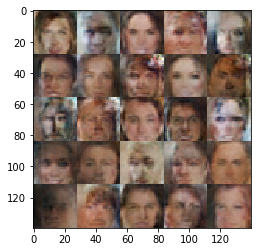

Epoch 2/3... Discriminator Loss: 0.7775... Generator Loss: 0.8589
Epoch 2/3... Discriminator Loss: 0.5597... Generator Loss: 2.4643
Epoch 2/3... Discriminator Loss: 0.2709... Generator Loss: 5.5867
Epoch 2/3... Discriminator Loss: 0.4675... Generator Loss: 2.5559
Epoch 2/3... Discriminator Loss: 0.6685... Generator Loss: 1.7461


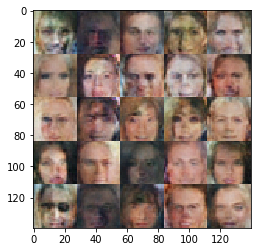

Epoch 2/3... Discriminator Loss: 0.7258... Generator Loss: 1.0665
Epoch 2/3... Discriminator Loss: 0.5917... Generator Loss: 2.1952
Epoch 2/3... Discriminator Loss: 0.4253... Generator Loss: 2.2943
Epoch 2/3... Discriminator Loss: 0.7033... Generator Loss: 2.8291
Epoch 2/3... Discriminator Loss: 0.3769... Generator Loss: 4.1608


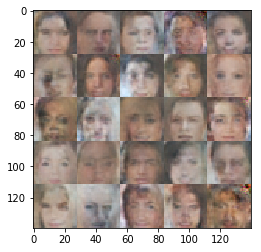

Epoch 2/3... Discriminator Loss: 0.6221... Generator Loss: 1.3294
Epoch 2/3... Discriminator Loss: 0.6297... Generator Loss: 1.8778
Epoch 2/3... Discriminator Loss: 0.6834... Generator Loss: 2.5604
Epoch 2/3... Discriminator Loss: 0.8624... Generator Loss: 0.9766
Epoch 2/3... Discriminator Loss: 0.5200... Generator Loss: 1.8240


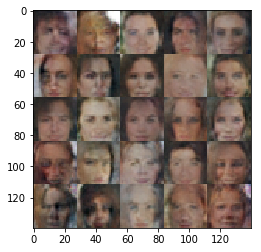

Epoch 2/3... Discriminator Loss: 0.8720... Generator Loss: 0.9033
Epoch 2/3... Discriminator Loss: 0.7210... Generator Loss: 1.7743
Epoch 2/3... Discriminator Loss: 0.4516... Generator Loss: 2.8696
Epoch 2/3... Discriminator Loss: 1.4839... Generator Loss: 3.8807
Epoch 2/3... Discriminator Loss: 0.4936... Generator Loss: 4.3689


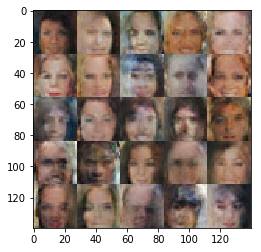

Epoch 2/3... Discriminator Loss: 0.9711... Generator Loss: 0.7079
Epoch 2/3... Discriminator Loss: 0.4614... Generator Loss: 2.5164
Epoch 2/3... Discriminator Loss: 0.6047... Generator Loss: 1.3916
Epoch 2/3... Discriminator Loss: 0.5933... Generator Loss: 1.8950
Epoch 2/3... Discriminator Loss: 0.5719... Generator Loss: 2.6296


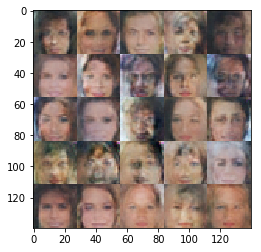

Epoch 2/3... Discriminator Loss: 0.9758... Generator Loss: 0.6530
Epoch 2/3... Discriminator Loss: 0.6386... Generator Loss: 1.8484
Epoch 2/3... Discriminator Loss: 0.8288... Generator Loss: 1.0265
Epoch 2/3... Discriminator Loss: 0.7071... Generator Loss: 1.9680
Epoch 2/3... Discriminator Loss: 0.6667... Generator Loss: 1.2184


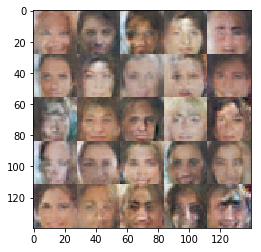

Epoch 2/3... Discriminator Loss: 0.8629... Generator Loss: 1.0208
Epoch 2/3... Discriminator Loss: 0.4347... Generator Loss: 4.4535
Epoch 2/3... Discriminator Loss: 0.3193... Generator Loss: 4.5819
Epoch 2/3... Discriminator Loss: 0.6247... Generator Loss: 3.3787
Epoch 2/3... Discriminator Loss: 0.5567... Generator Loss: 2.8120


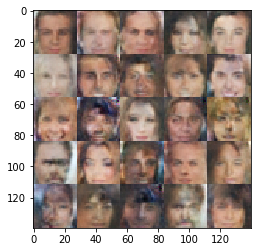

Epoch 2/3... Discriminator Loss: 0.3530... Generator Loss: 2.6051
Epoch 2/3... Discriminator Loss: 0.2859... Generator Loss: 3.1798
Epoch 2/3... Discriminator Loss: 0.4897... Generator Loss: 2.4370
Epoch 2/3... Discriminator Loss: 0.3910... Generator Loss: 2.4699
Epoch 2/3... Discriminator Loss: 0.7952... Generator Loss: 1.5070


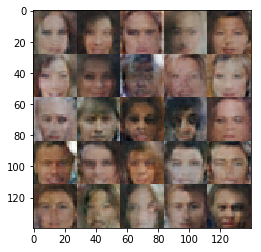

Epoch 2/3... Discriminator Loss: 1.0325... Generator Loss: 2.4807
Epoch 2/3... Discriminator Loss: 0.6295... Generator Loss: 1.5693
Epoch 2/3... Discriminator Loss: 0.6916... Generator Loss: 1.3188
Epoch 2/3... Discriminator Loss: 0.6250... Generator Loss: 1.6414
Epoch 2/3... Discriminator Loss: 0.6289... Generator Loss: 1.8142


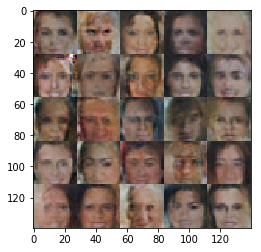

Epoch 2/3... Discriminator Loss: 0.9033... Generator Loss: 0.8587
Epoch 2/3... Discriminator Loss: 0.3749... Generator Loss: 3.3788
Epoch 2/3... Discriminator Loss: 0.6242... Generator Loss: 2.0572
Epoch 2/3... Discriminator Loss: 0.8406... Generator Loss: 0.9798
Epoch 2/3... Discriminator Loss: 0.5052... Generator Loss: 2.6746


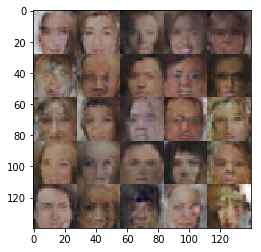

Epoch 2/3... Discriminator Loss: 0.5905... Generator Loss: 1.7143
Epoch 2/3... Discriminator Loss: 0.8981... Generator Loss: 1.3308
Epoch 2/3... Discriminator Loss: 1.0873... Generator Loss: 0.7496
Epoch 2/3... Discriminator Loss: 0.7347... Generator Loss: 3.5440
Epoch 2/3... Discriminator Loss: 1.0261... Generator Loss: 0.7409


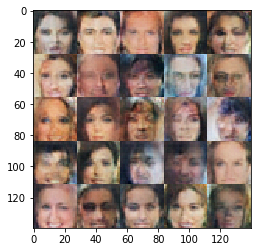

Epoch 2/3... Discriminator Loss: 0.1692... Generator Loss: 12.0974
Epoch 2/3... Discriminator Loss: 0.7948... Generator Loss: 0.9557
Epoch 2/3... Discriminator Loss: 0.6020... Generator Loss: 2.5098
Epoch 2/3... Discriminator Loss: 0.6511... Generator Loss: 1.9767
Epoch 2/3... Discriminator Loss: 0.6398... Generator Loss: 3.0273


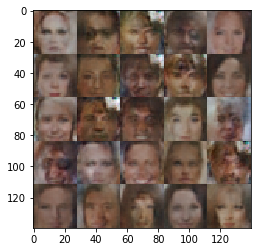

Epoch 2/3... Discriminator Loss: 0.6196... Generator Loss: 1.7591
Epoch 2/3... Discriminator Loss: 0.7046... Generator Loss: 3.8117
Epoch 2/3... Discriminator Loss: 0.5461... Generator Loss: 2.0949
Epoch 2/3... Discriminator Loss: 0.4236... Generator Loss: 5.5984
Epoch 2/3... Discriminator Loss: 0.5780... Generator Loss: 1.9372


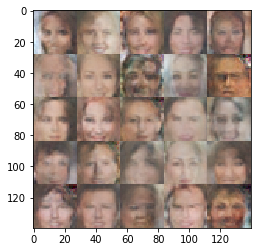

Epoch 2/3... Discriminator Loss: 0.5135... Generator Loss: 2.3645
Epoch 2/3... Discriminator Loss: 0.5254... Generator Loss: 2.8344
Epoch 2/3... Discriminator Loss: 0.4022... Generator Loss: 2.0566
Epoch 2/3... Discriminator Loss: 0.6481... Generator Loss: 1.6595
Epoch 2/3... Discriminator Loss: 0.6820... Generator Loss: 1.2441


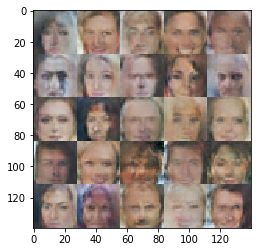

Epoch 2/3... Discriminator Loss: 0.4980... Generator Loss: 3.5299
Epoch 2/3... Discriminator Loss: 0.5978... Generator Loss: 2.1716
Epoch 2/3... Discriminator Loss: 0.6212... Generator Loss: 2.0314
Epoch 2/3... Discriminator Loss: 0.8419... Generator Loss: 1.2414
Epoch 2/3... Discriminator Loss: 0.1205... Generator Loss: 7.0377


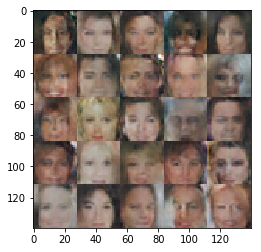

Epoch 2/3... Discriminator Loss: 0.8487... Generator Loss: 1.4409
Epoch 2/3... Discriminator Loss: 0.4816... Generator Loss: 3.6780
Epoch 2/3... Discriminator Loss: 0.5870... Generator Loss: 3.2769
Epoch 2/3... Discriminator Loss: 0.6084... Generator Loss: 1.8699
Epoch 2/3... Discriminator Loss: 0.5669... Generator Loss: 3.4883


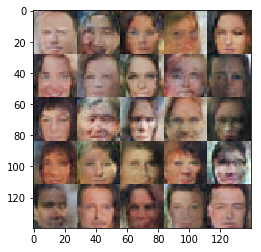

Epoch 2/3... Discriminator Loss: 0.5959... Generator Loss: 3.3550
Epoch 2/3... Discriminator Loss: 0.6808... Generator Loss: 1.5877
Epoch 2/3... Discriminator Loss: 0.7575... Generator Loss: 1.0397
Epoch 2/3... Discriminator Loss: 0.6900... Generator Loss: 1.2906
Epoch 2/3... Discriminator Loss: 0.5335... Generator Loss: 3.0951


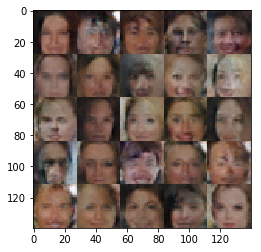

Epoch 2/3... Discriminator Loss: 0.7916... Generator Loss: 1.2478
Epoch 2/3... Discriminator Loss: 0.3776... Generator Loss: 2.5485
Epoch 2/3... Discriminator Loss: 0.4674... Generator Loss: 2.1569
Epoch 2/3... Discriminator Loss: 0.4951... Generator Loss: 2.8066
Epoch 2/3... Discriminator Loss: 1.2000... Generator Loss: 0.5343


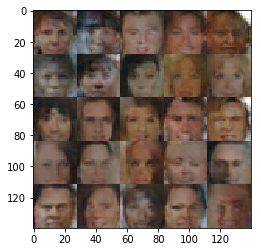

Epoch 2/3... Discriminator Loss: 0.8564... Generator Loss: 0.8982
Epoch 2/3... Discriminator Loss: 1.3505... Generator Loss: 0.6185
Epoch 2/3... Discriminator Loss: 0.7982... Generator Loss: 1.0563
Epoch 2/3... Discriminator Loss: 0.3924... Generator Loss: 2.3884
Epoch 2/3... Discriminator Loss: 0.4242... Generator Loss: 3.8097


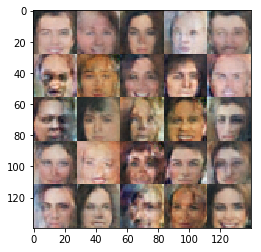

Epoch 2/3... Discriminator Loss: 0.8655... Generator Loss: 1.2771
Epoch 2/3... Discriminator Loss: 0.8901... Generator Loss: 1.2342
Epoch 2/3... Discriminator Loss: 0.7341... Generator Loss: 1.0622
Epoch 2/3... Discriminator Loss: 0.6824... Generator Loss: 2.8284
Epoch 2/3... Discriminator Loss: 0.5283... Generator Loss: 2.2025


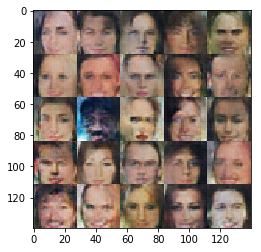

Epoch 2/3... Discriminator Loss: 0.8367... Generator Loss: 3.1752
Epoch 2/3... Discriminator Loss: 0.9591... Generator Loss: 3.0646
Epoch 2/3... Discriminator Loss: 0.5585... Generator Loss: 2.8186
Epoch 2/3... Discriminator Loss: 0.5273... Generator Loss: 3.2612
Epoch 2/3... Discriminator Loss: 0.3121... Generator Loss: 2.3261


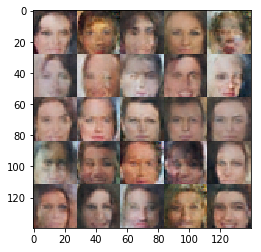

Epoch 2/3... Discriminator Loss: 0.7638... Generator Loss: 1.4209
Epoch 2/3... Discriminator Loss: 0.6764... Generator Loss: 1.7587
Epoch 2/3... Discriminator Loss: 0.6938... Generator Loss: 1.4281
Epoch 2/3... Discriminator Loss: 0.9160... Generator Loss: 1.6118
Epoch 2/3... Discriminator Loss: 0.7083... Generator Loss: 1.6859


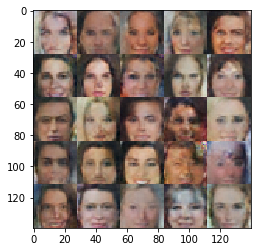

Epoch 2/3... Discriminator Loss: 0.4683... Generator Loss: 3.7856
Epoch 2/3... Discriminator Loss: 0.5389... Generator Loss: 2.1786
Epoch 2/3... Discriminator Loss: 0.1391... Generator Loss: 4.3022
Epoch 2/3... Discriminator Loss: 0.5997... Generator Loss: 2.9950
Epoch 2/3... Discriminator Loss: 0.6532... Generator Loss: 2.5285


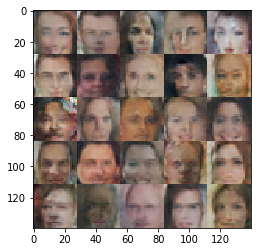

Epoch 2/3... Discriminator Loss: 1.0814... Generator Loss: 1.5451
Epoch 2/3... Discriminator Loss: 0.4956... Generator Loss: 1.5258
Epoch 2/3... Discriminator Loss: 0.5261... Generator Loss: 1.8493
Epoch 2/3... Discriminator Loss: 0.6736... Generator Loss: 1.4493
Epoch 2/3... Discriminator Loss: 0.8269... Generator Loss: 1.0933


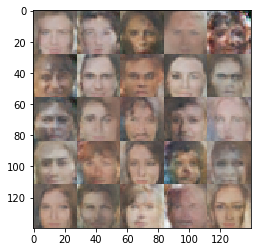

Epoch 2/3... Discriminator Loss: 0.7505... Generator Loss: 3.3969
Epoch 2/3... Discriminator Loss: 0.8020... Generator Loss: 1.3563
Epoch 2/3... Discriminator Loss: 0.2010... Generator Loss: 6.3181
Epoch 2/3... Discriminator Loss: 1.7794... Generator Loss: 0.3391
Epoch 2/3... Discriminator Loss: 0.5174... Generator Loss: 3.0207


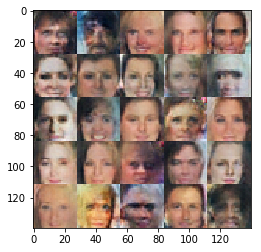

Epoch 2/3... Discriminator Loss: 0.5212... Generator Loss: 2.3969
Epoch 2/3... Discriminator Loss: 0.6537... Generator Loss: 1.4290
Epoch 2/3... Discriminator Loss: 0.7435... Generator Loss: 2.5885
Epoch 2/3... Discriminator Loss: 0.5687... Generator Loss: 3.1666
Epoch 2/3... Discriminator Loss: 1.1545... Generator Loss: 0.6904


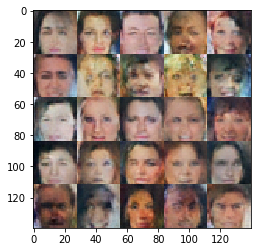

Epoch 2/3... Discriminator Loss: 0.7106... Generator Loss: 2.0403
Epoch 2/3... Discriminator Loss: 0.9951... Generator Loss: 1.8451
Epoch 2/3... Discriminator Loss: 1.3919... Generator Loss: 0.7805
Epoch 2/3... Discriminator Loss: 0.7440... Generator Loss: 2.0299
Epoch 2/3... Discriminator Loss: 0.8716... Generator Loss: 0.9155


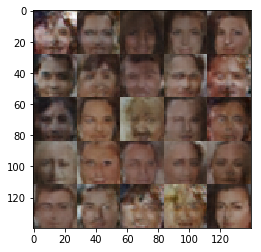

Epoch 2/3... Discriminator Loss: 0.9286... Generator Loss: 1.8089
Epoch 3/3... Discriminator Loss: 0.6768... Generator Loss: 1.7921
Epoch 3/3... Discriminator Loss: 0.5042... Generator Loss: 3.4810
Epoch 3/3... Discriminator Loss: 0.2623... Generator Loss: 5.6494
Epoch 3/3... Discriminator Loss: 1.3265... Generator Loss: 0.5510


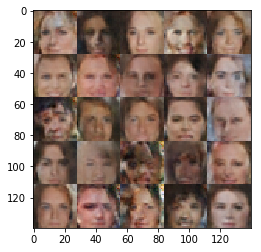

Epoch 3/3... Discriminator Loss: 0.6096... Generator Loss: 2.0230
Epoch 3/3... Discriminator Loss: 1.0411... Generator Loss: 1.0116
Epoch 3/3... Discriminator Loss: 0.6856... Generator Loss: 1.4571
Epoch 3/3... Discriminator Loss: 0.9867... Generator Loss: 0.9077
Epoch 3/3... Discriminator Loss: 0.6640... Generator Loss: 3.4101


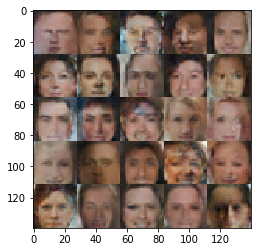

Epoch 3/3... Discriminator Loss: 0.8382... Generator Loss: 1.7490
Epoch 3/3... Discriminator Loss: 0.8247... Generator Loss: 1.0916
Epoch 3/3... Discriminator Loss: 0.8767... Generator Loss: 1.2403
Epoch 3/3... Discriminator Loss: 0.6150... Generator Loss: 1.5647
Epoch 3/3... Discriminator Loss: 0.8689... Generator Loss: 0.9105


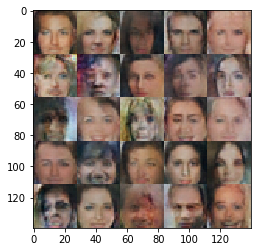

Epoch 3/3... Discriminator Loss: 0.7603... Generator Loss: 2.0191
Epoch 3/3... Discriminator Loss: 0.6676... Generator Loss: 2.0686
Epoch 3/3... Discriminator Loss: 0.6224... Generator Loss: 1.8194
Epoch 3/3... Discriminator Loss: 0.8069... Generator Loss: 1.6540
Epoch 3/3... Discriminator Loss: 0.4059... Generator Loss: 3.4271


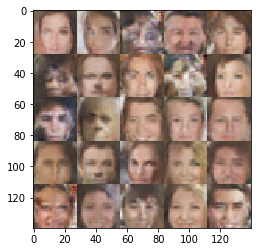

Epoch 3/3... Discriminator Loss: 0.5962... Generator Loss: 1.8001
Epoch 3/3... Discriminator Loss: 0.2933... Generator Loss: 2.6391
Epoch 3/3... Discriminator Loss: 0.5618... Generator Loss: 3.0644
Epoch 3/3... Discriminator Loss: 0.6073... Generator Loss: 1.6151
Epoch 3/3... Discriminator Loss: 0.6453... Generator Loss: 2.0953


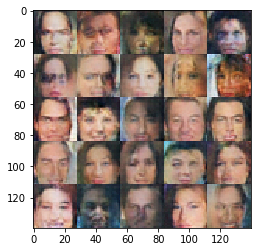

Epoch 3/3... Discriminator Loss: 0.7046... Generator Loss: 1.4780
Epoch 3/3... Discriminator Loss: 1.1168... Generator Loss: 1.4093
Epoch 3/3... Discriminator Loss: 0.6682... Generator Loss: 3.6455
Epoch 3/3... Discriminator Loss: 0.9609... Generator Loss: 1.0395
Epoch 3/3... Discriminator Loss: 0.6182... Generator Loss: 1.5047


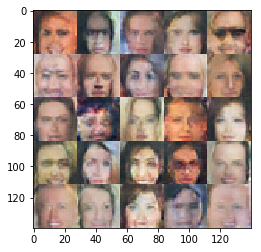

Epoch 3/3... Discriminator Loss: 0.6998... Generator Loss: 1.1086
Epoch 3/3... Discriminator Loss: 0.8697... Generator Loss: 1.6665
Epoch 3/3... Discriminator Loss: 0.9070... Generator Loss: 1.8138
Epoch 3/3... Discriminator Loss: 1.0240... Generator Loss: 1.4474
Epoch 3/3... Discriminator Loss: 0.6506... Generator Loss: 1.5599


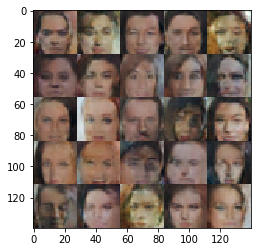

Epoch 3/3... Discriminator Loss: 0.9122... Generator Loss: 1.4549
Epoch 3/3... Discriminator Loss: 0.8133... Generator Loss: 2.0615
Epoch 3/3... Discriminator Loss: 0.8043... Generator Loss: 1.4364
Epoch 3/3... Discriminator Loss: 0.7391... Generator Loss: 1.8668
Epoch 3/3... Discriminator Loss: 0.8477... Generator Loss: 1.0548


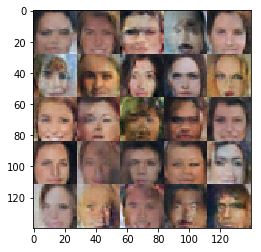

Epoch 3/3... Discriminator Loss: 0.7727... Generator Loss: 1.0170
Epoch 3/3... Discriminator Loss: 0.6164... Generator Loss: 3.2073
Epoch 3/3... Discriminator Loss: 0.6105... Generator Loss: 3.2748
Epoch 3/3... Discriminator Loss: 0.9620... Generator Loss: 1.0707
Epoch 3/3... Discriminator Loss: 0.9743... Generator Loss: 1.0140


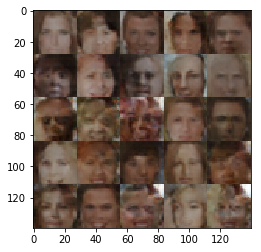

Epoch 3/3... Discriminator Loss: 0.7999... Generator Loss: 1.5884
Epoch 3/3... Discriminator Loss: 0.5250... Generator Loss: 1.5599
Epoch 3/3... Discriminator Loss: 0.8976... Generator Loss: 0.8012
Epoch 3/3... Discriminator Loss: 2.1311... Generator Loss: 0.8110
Epoch 3/3... Discriminator Loss: 0.8836... Generator Loss: 1.1781


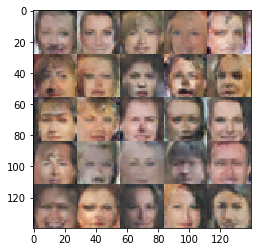

Epoch 3/3... Discriminator Loss: 0.6927... Generator Loss: 2.9560
Epoch 3/3... Discriminator Loss: 0.7395... Generator Loss: 1.3389
Epoch 3/3... Discriminator Loss: 0.8495... Generator Loss: 0.9125
Epoch 3/3... Discriminator Loss: 0.6280... Generator Loss: 2.3739
Epoch 3/3... Discriminator Loss: 0.7540... Generator Loss: 1.9001


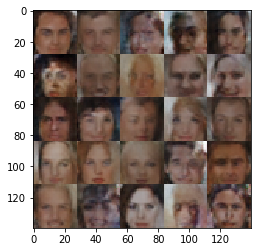

Epoch 3/3... Discriminator Loss: 0.5942... Generator Loss: 1.7227
Epoch 3/3... Discriminator Loss: 0.5551... Generator Loss: 3.9219
Epoch 3/3... Discriminator Loss: 0.7567... Generator Loss: 2.8510
Epoch 3/3... Discriminator Loss: 0.8218... Generator Loss: 1.4298
Epoch 3/3... Discriminator Loss: 0.6464... Generator Loss: 2.1697


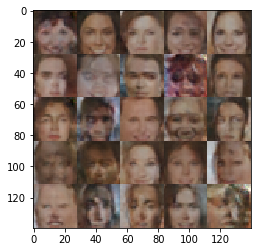

Epoch 3/3... Discriminator Loss: 1.9377... Generator Loss: 0.3451
Epoch 3/3... Discriminator Loss: 0.7840... Generator Loss: 1.6721
Epoch 3/3... Discriminator Loss: 0.2370... Generator Loss: 4.7030
Epoch 3/3... Discriminator Loss: 0.9964... Generator Loss: 1.2953
Epoch 3/3... Discriminator Loss: 0.9861... Generator Loss: 0.7217


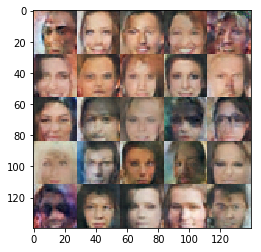

Epoch 3/3... Discriminator Loss: 0.7378... Generator Loss: 1.6251
Epoch 3/3... Discriminator Loss: 0.5225... Generator Loss: 2.2012
Epoch 3/3... Discriminator Loss: 0.7847... Generator Loss: 2.1388
Epoch 3/3... Discriminator Loss: 0.9775... Generator Loss: 1.1640
Epoch 3/3... Discriminator Loss: 0.7060... Generator Loss: 1.7535


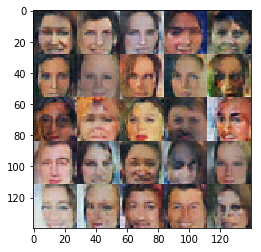

Epoch 3/3... Discriminator Loss: 0.7939... Generator Loss: 2.3651
Epoch 3/3... Discriminator Loss: 0.3306... Generator Loss: 2.3593
Epoch 3/3... Discriminator Loss: 0.4142... Generator Loss: 4.1971
Epoch 3/3... Discriminator Loss: 0.7081... Generator Loss: 5.7388
Epoch 3/3... Discriminator Loss: 0.8103... Generator Loss: 1.2544


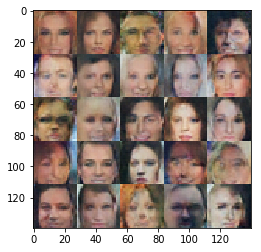

Epoch 3/3... Discriminator Loss: 0.7907... Generator Loss: 1.4788
Epoch 3/3... Discriminator Loss: 0.7406... Generator Loss: 2.2622
Epoch 3/3... Discriminator Loss: 0.6803... Generator Loss: 2.1468
Epoch 3/3... Discriminator Loss: 0.8757... Generator Loss: 1.2988
Epoch 3/3... Discriminator Loss: 0.5035... Generator Loss: 2.5478


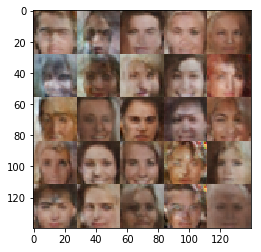

Epoch 3/3... Discriminator Loss: 0.8178... Generator Loss: 1.2900
Epoch 3/3... Discriminator Loss: 1.2306... Generator Loss: 0.8994
Epoch 3/3... Discriminator Loss: 1.0089... Generator Loss: 0.9216
Epoch 3/3... Discriminator Loss: 0.4797... Generator Loss: 2.9692
Epoch 3/3... Discriminator Loss: 0.7818... Generator Loss: 1.6779


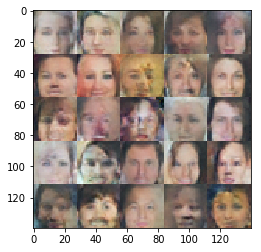

Epoch 3/3... Discriminator Loss: 0.7489... Generator Loss: 1.4637
Epoch 3/3... Discriminator Loss: 0.8852... Generator Loss: 0.9170
Epoch 3/3... Discriminator Loss: 0.6460... Generator Loss: 1.8715
Epoch 3/3... Discriminator Loss: 0.7188... Generator Loss: 1.8079
Epoch 3/3... Discriminator Loss: 0.7040... Generator Loss: 5.1498


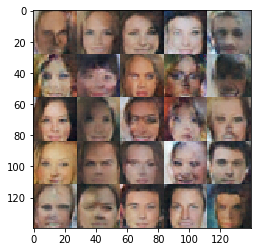

Epoch 3/3... Discriminator Loss: 0.8133... Generator Loss: 1.5482
Epoch 3/3... Discriminator Loss: 0.4869... Generator Loss: 3.2751
Epoch 3/3... Discriminator Loss: 0.4844... Generator Loss: 1.9306
Epoch 3/3... Discriminator Loss: 0.6177... Generator Loss: 2.8310
Epoch 3/3... Discriminator Loss: 1.0194... Generator Loss: 1.1201


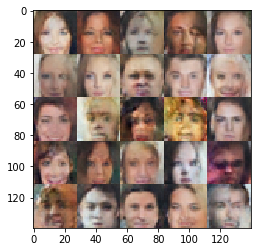

Epoch 3/3... Discriminator Loss: 0.3723... Generator Loss: 2.3045
Epoch 3/3... Discriminator Loss: 1.0290... Generator Loss: 1.1271
Epoch 3/3... Discriminator Loss: 0.5977... Generator Loss: 1.7155
Epoch 3/3... Discriminator Loss: 0.5980... Generator Loss: 2.0255
Epoch 3/3... Discriminator Loss: 0.7868... Generator Loss: 2.2999


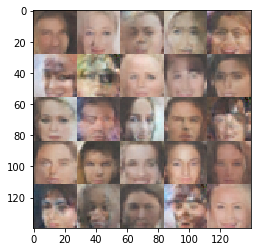

Epoch 3/3... Discriminator Loss: 0.9665... Generator Loss: 2.3735
Epoch 3/3... Discriminator Loss: 1.1629... Generator Loss: 0.7953
Epoch 3/3... Discriminator Loss: 0.9505... Generator Loss: 0.8925
Epoch 3/3... Discriminator Loss: 0.5780... Generator Loss: 3.5970
Epoch 3/3... Discriminator Loss: 1.3802... Generator Loss: 0.9997


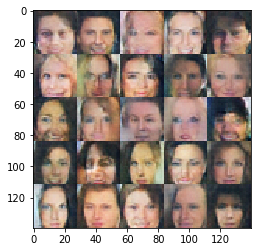

Epoch 3/3... Discriminator Loss: 0.7833... Generator Loss: 1.1895
Epoch 3/3... Discriminator Loss: 0.5895... Generator Loss: 1.9309
Epoch 3/3... Discriminator Loss: 0.6924... Generator Loss: 1.6061
Epoch 3/3... Discriminator Loss: 1.4339... Generator Loss: 1.8695
Epoch 3/3... Discriminator Loss: 1.0534... Generator Loss: 0.7687


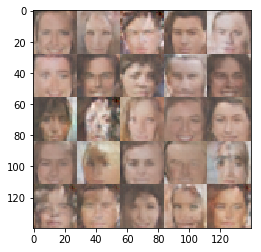

Epoch 3/3... Discriminator Loss: 0.7937... Generator Loss: 1.4191
Epoch 3/3... Discriminator Loss: 0.7383... Generator Loss: 3.1755
Epoch 3/3... Discriminator Loss: 0.4888... Generator Loss: 3.0141
Epoch 3/3... Discriminator Loss: 0.6577... Generator Loss: 1.5246
Epoch 3/3... Discriminator Loss: 0.5756... Generator Loss: 3.4141


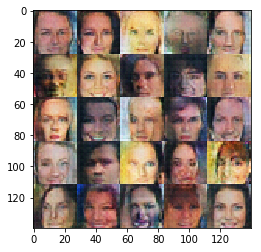

Epoch 3/3... Discriminator Loss: 0.5777... Generator Loss: 2.3782
Epoch 3/3... Discriminator Loss: 0.9180... Generator Loss: 0.9914
Epoch 3/3... Discriminator Loss: 1.0370... Generator Loss: 0.7009
Epoch 3/3... Discriminator Loss: 0.5978... Generator Loss: 1.8166
Epoch 3/3... Discriminator Loss: 0.9486... Generator Loss: 1.5195


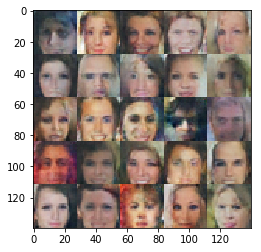

Epoch 3/3... Discriminator Loss: 0.7283... Generator Loss: 1.0809
Epoch 3/3... Discriminator Loss: 0.6789... Generator Loss: 2.2933
Epoch 3/3... Discriminator Loss: 0.7776... Generator Loss: 1.3374
Epoch 3/3... Discriminator Loss: 0.7299... Generator Loss: 1.2598
Epoch 3/3... Discriminator Loss: 1.0421... Generator Loss: 1.1034


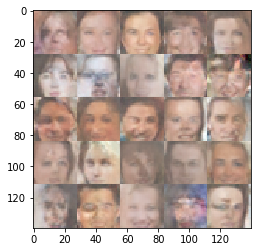

Epoch 3/3... Discriminator Loss: 1.0517... Generator Loss: 0.8085
Epoch 3/3... Discriminator Loss: 0.8703... Generator Loss: 1.1296
Epoch 3/3... Discriminator Loss: 0.7567... Generator Loss: 1.3619
Epoch 3/3... Discriminator Loss: 0.8882... Generator Loss: 1.2449
Epoch 3/3... Discriminator Loss: 0.7510... Generator Loss: 1.9176


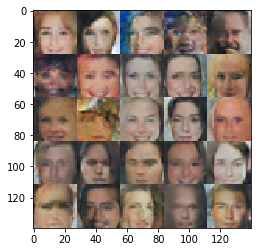

Epoch 3/3... Discriminator Loss: 1.0549... Generator Loss: 1.1797
Epoch 3/3... Discriminator Loss: 1.0511... Generator Loss: 0.8526
Epoch 3/3... Discriminator Loss: 0.6282... Generator Loss: 3.6925
Epoch 3/3... Discriminator Loss: 0.9720... Generator Loss: 0.7925
Epoch 3/3... Discriminator Loss: 0.8797... Generator Loss: 0.9253


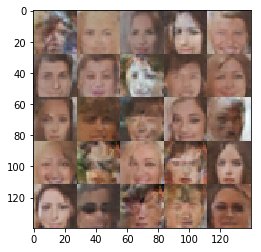

Epoch 3/3... Discriminator Loss: 0.7185... Generator Loss: 1.5993
Epoch 3/3... Discriminator Loss: 0.8775... Generator Loss: 1.1359
Epoch 3/3... Discriminator Loss: 1.1405... Generator Loss: 1.0749
Epoch 3/3... Discriminator Loss: 0.9598... Generator Loss: 0.8731
Epoch 3/3... Discriminator Loss: 0.9867... Generator Loss: 1.0270


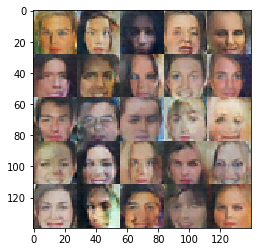

Epoch 3/3... Discriminator Loss: 0.5082... Generator Loss: 7.0149
Epoch 3/3... Discriminator Loss: 0.8525... Generator Loss: 2.7583
Epoch 3/3... Discriminator Loss: 0.8800... Generator Loss: 2.3668
Epoch 3/3... Discriminator Loss: 0.8282... Generator Loss: 1.1238
Epoch 3/3... Discriminator Loss: 0.4238... Generator Loss: 2.2525


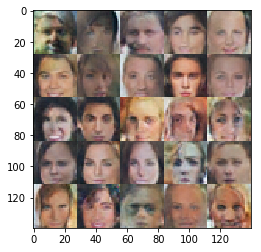

Epoch 3/3... Discriminator Loss: 0.8589... Generator Loss: 1.9435
Epoch 3/3... Discriminator Loss: 0.6313... Generator Loss: 3.2113
Epoch 3/3... Discriminator Loss: 1.1537... Generator Loss: 0.6880
Epoch 3/3... Discriminator Loss: 1.0634... Generator Loss: 1.1590
Epoch 3/3... Discriminator Loss: 1.0813... Generator Loss: 1.1877


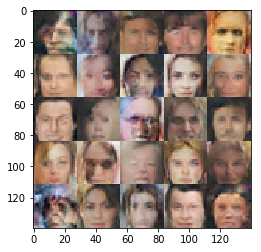

Epoch 3/3... Discriminator Loss: 0.6962... Generator Loss: 1.5269
Epoch 3/3... Discriminator Loss: 0.9828... Generator Loss: 0.9374
Epoch 3/3... Discriminator Loss: 0.7466... Generator Loss: 1.3585
Epoch 3/3... Discriminator Loss: 1.6593... Generator Loss: 0.3261
Epoch 3/3... Discriminator Loss: 0.9478... Generator Loss: 1.6548


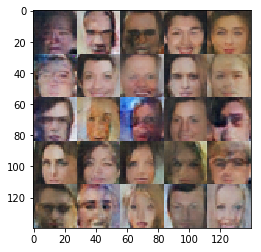

Epoch 3/3... Discriminator Loss: 0.9744... Generator Loss: 1.3830
Epoch 3/3... Discriminator Loss: 0.7083... Generator Loss: 2.0527
Epoch 3/3... Discriminator Loss: 0.4154... Generator Loss: 3.0405
Epoch 3/3... Discriminator Loss: 1.2811... Generator Loss: 1.1450


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。